
# Analyse von Log-Einträgen pro Benutzer nach Studiengängen

Die Mengen an Log-Einträgen pro Benutzer werden im Kontext der Studiengänge betrachtet.

**Ergebnis**
Die Mengen an Log-Einträgen pro Benutzer waren in den jeweiligen Studiengängen sehr unterschiedlich.
In einigen Fällen waren Benutzer auch in mehreren Studiengängen aktiv, was auf eine Dozententätigkeit hindeuten könnte.

### Import von Bibliotheken und anderen Erweiterungen

In [1]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [2]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [3]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [4]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [5]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [6]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Gegenstand der Untersuchungen sind nur Datensätze mit einer userid größer als 0. Damit werden jene Benutzer bei der Analyse nicht beachtet, die einer
# Beobachtung ihres Verhaltens nicht zugestimmt haben (userid = –2) oder die im Bachelor-Studiengang Medieninformatik Online studierten (userid = –3).
moodle_data = moodle_data[moodle_data.userid > 0]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,-2,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233121,2020-10-12 07:19:09,,0
2,0,0,3,0,loggedin,\core\event\user_loggedin,user,3463,2020-10-12 07:22:31,,0
3,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233436,2020-10-12 07:48:03,,0
4,0,0,4,0,loggedin,\core\event\user_loggedin,user,6881,2020-10-12 07:55:19,,0
...,...,...,...,...,...,...,...,...,...,...,...
969025,0,0,26,26,viewed,\core\event\dashboard_viewed,,0,2021-06-03 10:00:41,,0
969026,1750,0,26,0,viewed,\core\event\course_viewed,,0,2021-06-03 10:00:45,,0
969027,1750,0,26,0,viewed,\mod_forum\event\course_module_viewed,forum,7082,2021-06-03 10:00:47,,0
969028,1750,0,26,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,334595,2021-06-03 10:00:49,,0


### Ausgabe der Mengen an Log-Einträgen pro userid für alle Studiengänge

In [7]:
loggings_per_user = moodle_data.userid.groupby(moodle_data.userid).count()
display(loggings_per_user)

userid
1       3865
2       4706
3       3373
4       8882
6      28839
       ...  
140     1488
141      310
142       10
143     1387
144      240
Name: userid, Length: 142, dtype: int64

In [8]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_user.describe())

count      142.000000
mean      6339.021127
std      10188.002582
min         10.000000
25%       1817.000000
50%       3757.000000
75%       5903.500000
max      92242.000000
Name: userid, dtype: float64

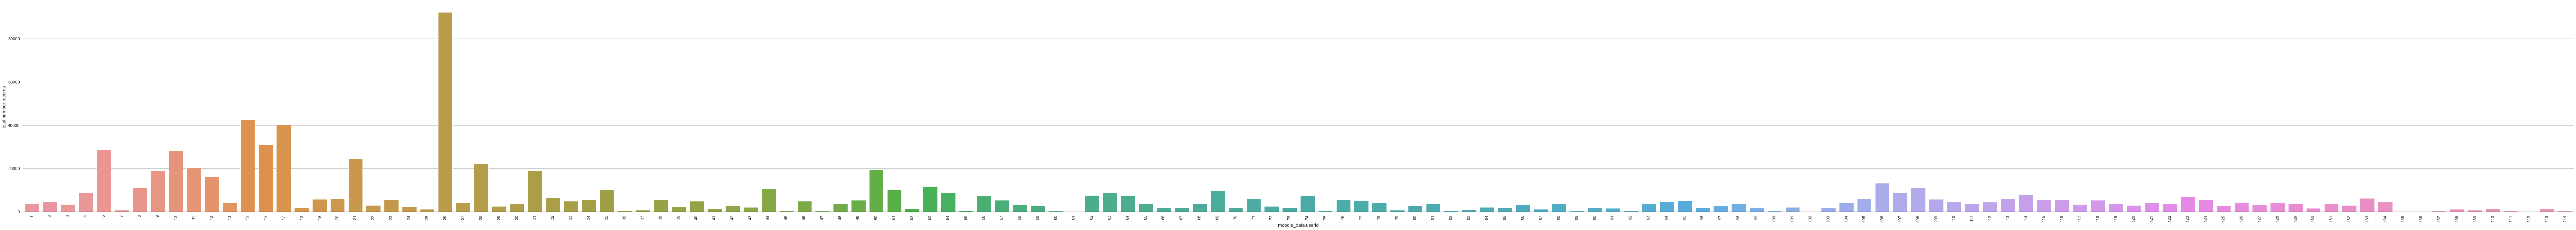

In [9]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_user.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro userid für alle Studiengänge
result = loggings_per_user
# Visualisierung der Mengen an Log-Einträgen pro userid für alle Studiengänge
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Mengen an Log-Einträgen pro userid für alle Studiengänge, differenziert nach Studiengängen**

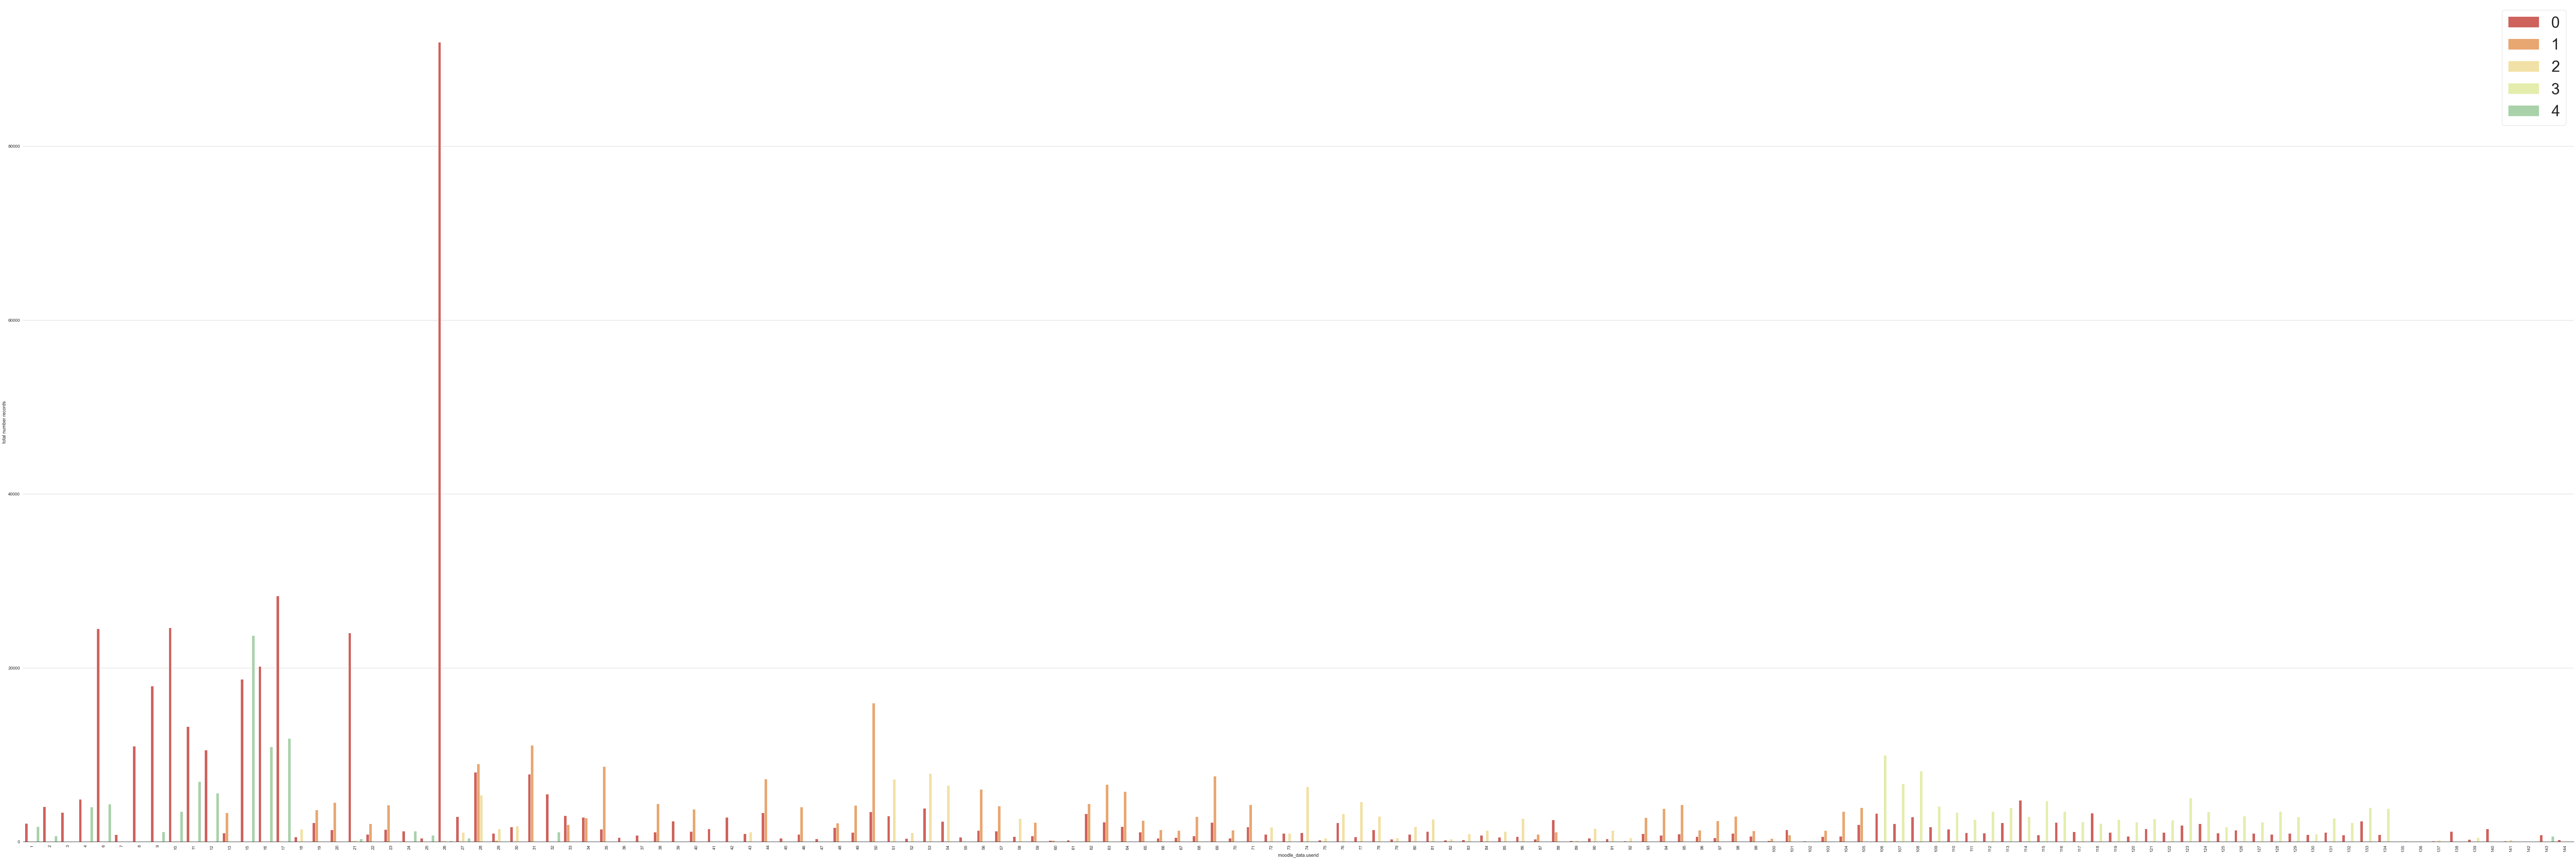

In [10]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(142, 48)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Mengen an Log-Einträgen pro userid für alle Studiengänge
chart = sns.countplot(x=moodle_data.userid, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='upper right', fontsize=48)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro userid für den Studiengang 0

In [11]:
loggings_per_user = moodle_data.userid[moodle_data.Studiengang.astype(int) == 0].groupby(moodle_data.userid).count()
display(loggings_per_user)

userid
1       2123
2       4026
3       3373
4       4877
6      24496
       ...  
140     1488
141       93
142        5
143      769
144      240
Name: userid, Length: 142, dtype: int64

In [12]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_user.describe())

count      142.000000
mean      3311.281690
std       9018.929056
min          5.000000
25%        598.000000
50%       1065.000000
75%       2222.000000
max      91966.000000
Name: userid, dtype: float64

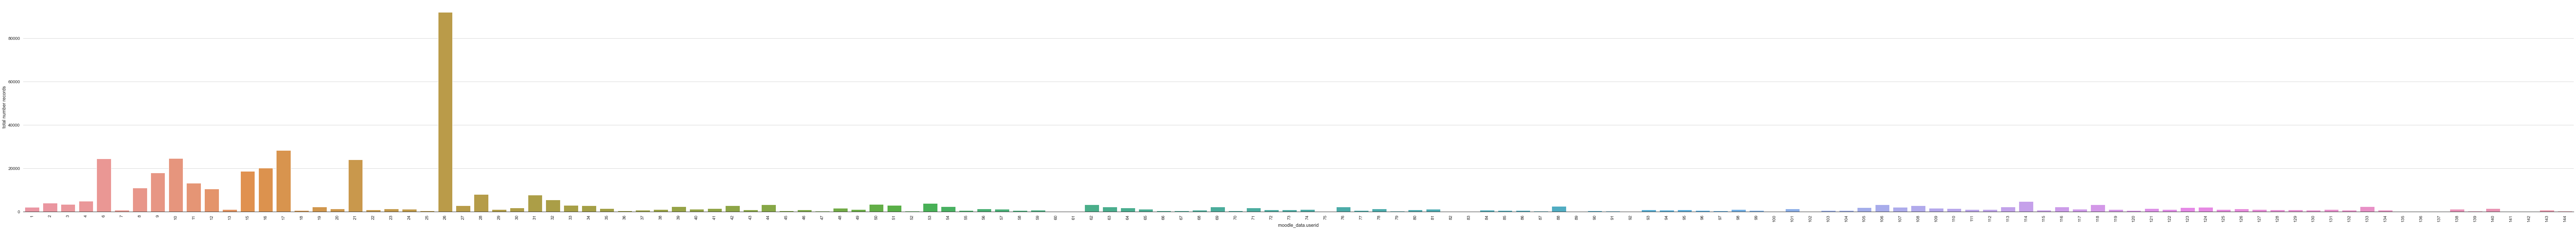

In [13]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_user.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro userid für den Studiengang 0
result = loggings_per_user
# Visualisierung der Mengen an Log-Einträgen pro userid für den Studiengang 0
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro userid für den Studiengang 1

In [14]:
loggings_per_user = moodle_data.userid[moodle_data.Studiengang.astype(int) == 1].groupby(moodle_data.userid).count()
display(loggings_per_user)

userid
13      3322
19      3656
20      4527
21        73
22      2086
23      4235
26        57
28      8955
29       132
30        12
31     11121
33      1954
34      2739
35      8654
38      4383
40      3749
44      7209
46      4001
48      2133
49      4197
50     15952
56      6042
57      4122
59      2211
60       140
62      4379
63      6602
64      5789
65      2458
66      1371
67      1304
68      2900
69      7552
70      1327
71      4269
81        22
87       860
88      1130
93      2776
94      3823
95      4265
96      1346
97      2400
98      2914
99      1267
100      373
101      765
102       37
103     1304
104     3494
105     3933
142        5
Name: userid, dtype: int64

In [15]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_user.describe())

count       52.000000
mean      3352.442308
std       3102.089912
min          5.000000
25%       1294.750000
50%       2838.000000
75%       4266.000000
max      15952.000000
Name: userid, dtype: float64

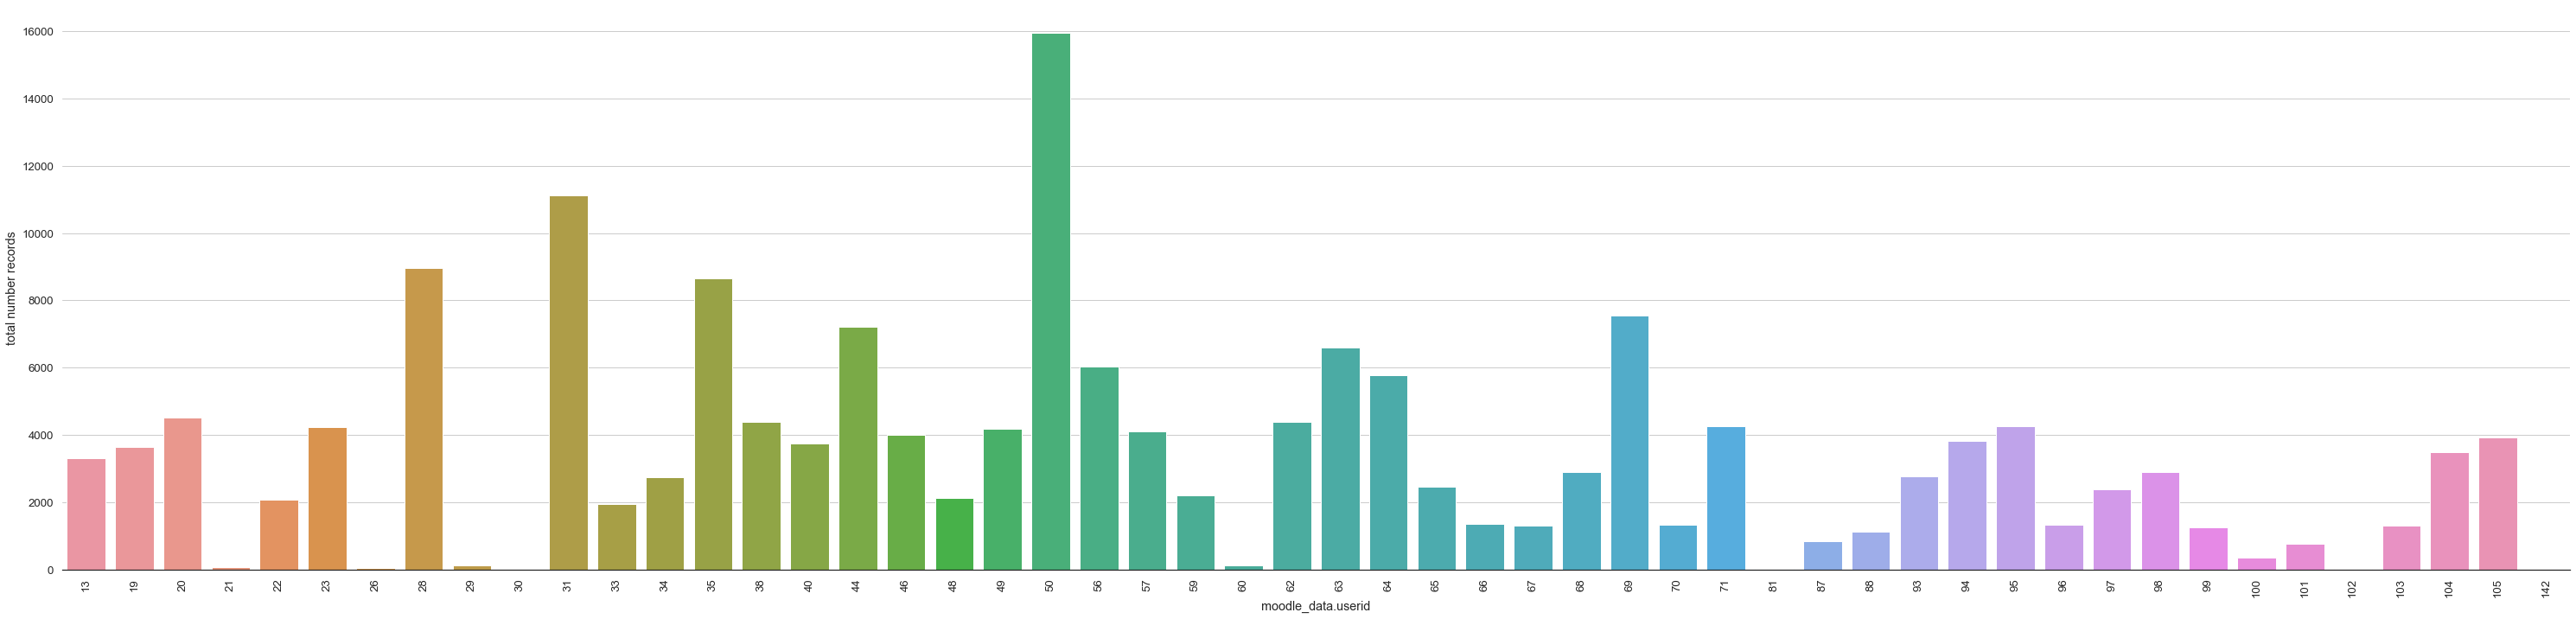

In [16]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_user.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro userid für den Studiengang 1
result = loggings_per_user
# Visualisierung der Mengen an Log-Einträgen pro userid für den Studiengang 1
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro userid für den Studiengang 2

In [17]:
loggings_per_user = moodle_data.userid[moodle_data.Studiengang.astype(int) == 2].groupby(moodle_data.userid).count()
display(loggings_per_user)

userid
6        18
18     1430
21      164
26       95
27     1086
28     5352
29     1476
30     1806
32       22
43     1130
44        3
51     7174
52     1036
53     7846
54     6472
55        6
58     2679
72     1684
73      974
74     6341
75      415
76     3237
77     4602
78     2940
79      458
80     1759
81     2595
82      304
83      875
84     1298
85     1204
86     2666
88       78
89      149
90     1513
91     1313
92      449
137     171
141     217
Name: userid, dtype: int64

In [18]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_user.describe())

count      39.000000
mean     1872.743590
std      2145.546657
min         3.000000
25%       260.500000
50%      1204.000000
75%      2630.500000
max      7846.000000
Name: userid, dtype: float64

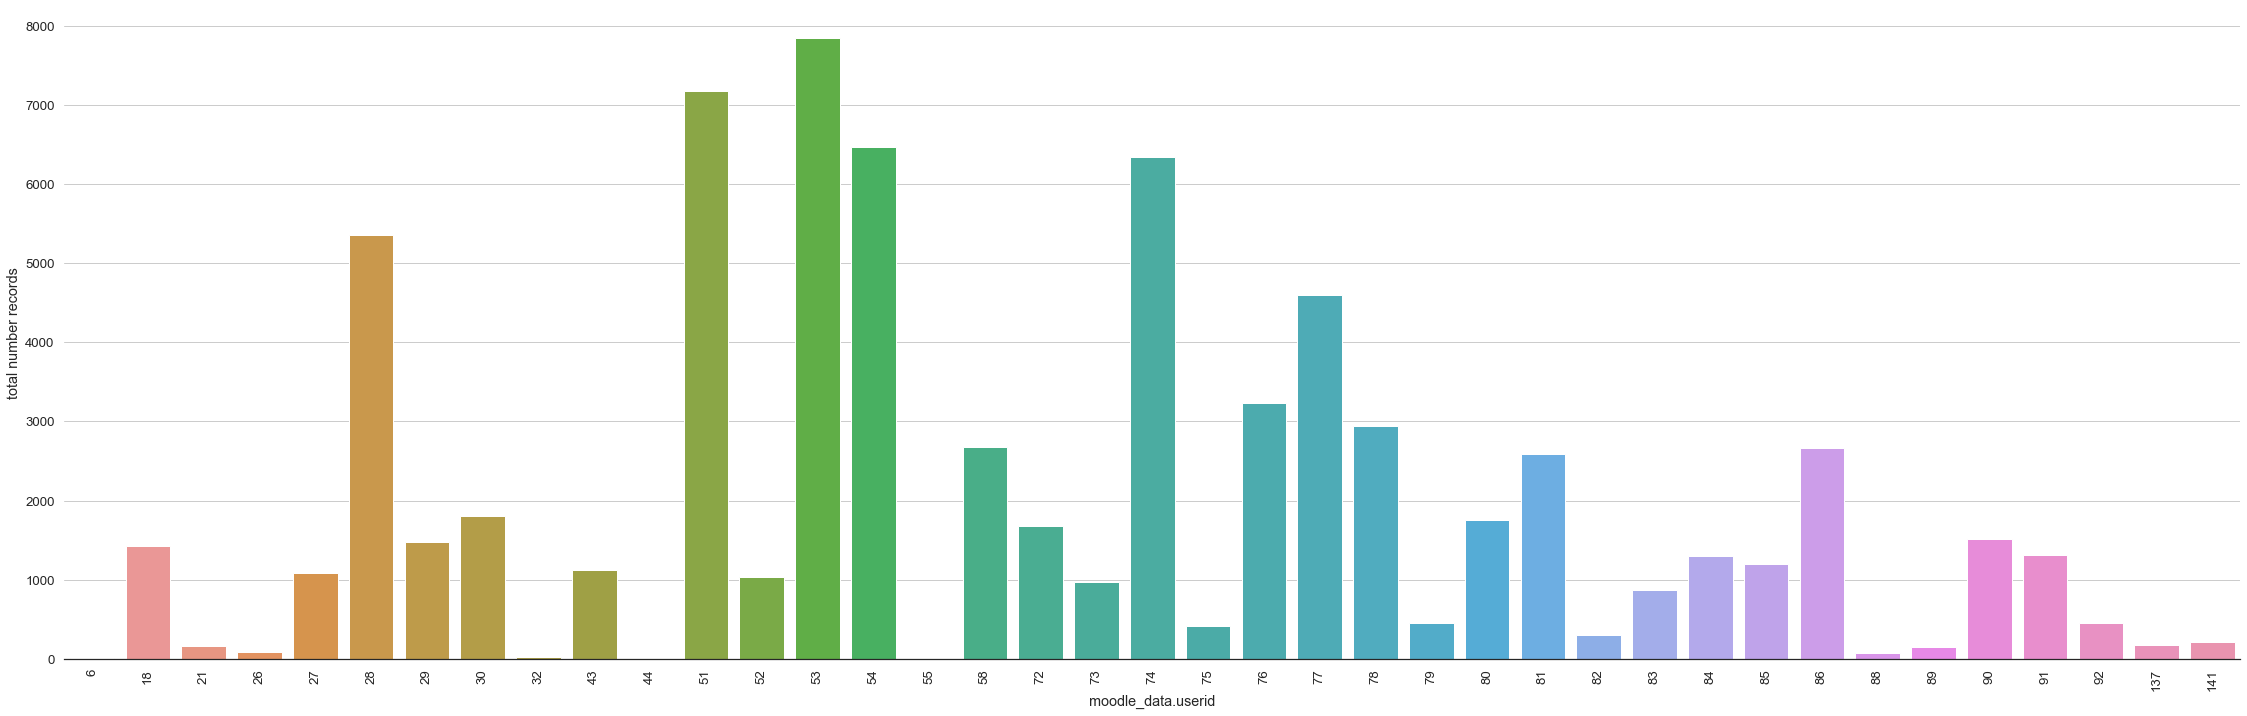

In [19]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_user.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro userid für den Studiengang 2
result = loggings_per_user
# Visualisierung der Mengen an Log-Einträgen pro userid für den Studiengang 2
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro userid für den Studiengang 3

In [20]:
loggings_per_user = moodle_data.userid[moodle_data.Studiengang.astype(int) == 3].groupby(moodle_data.userid).count()
display(loggings_per_user)

userid
26        6
106    9967
107    6660
108    8143
109    4085
110    3379
111    2557
112    3488
113    3926
114    2890
115    4702
116    3489
117    2314
118    2125
119    2556
120    2257
121    2639
122    2494
123    5022
124    3434
125    1687
126    2979
127    2275
128    3471
129    2845
130     893
131    2689
132    2198
133    3941
134    3826
135     115
139     466
Name: userid, dtype: int64

In [21]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_user.describe())

count      32.000000
mean     3234.937500
std      2063.349062
min         6.000000
25%      2270.500000
50%      2867.500000
75%      3851.000000
max      9967.000000
Name: userid, dtype: float64

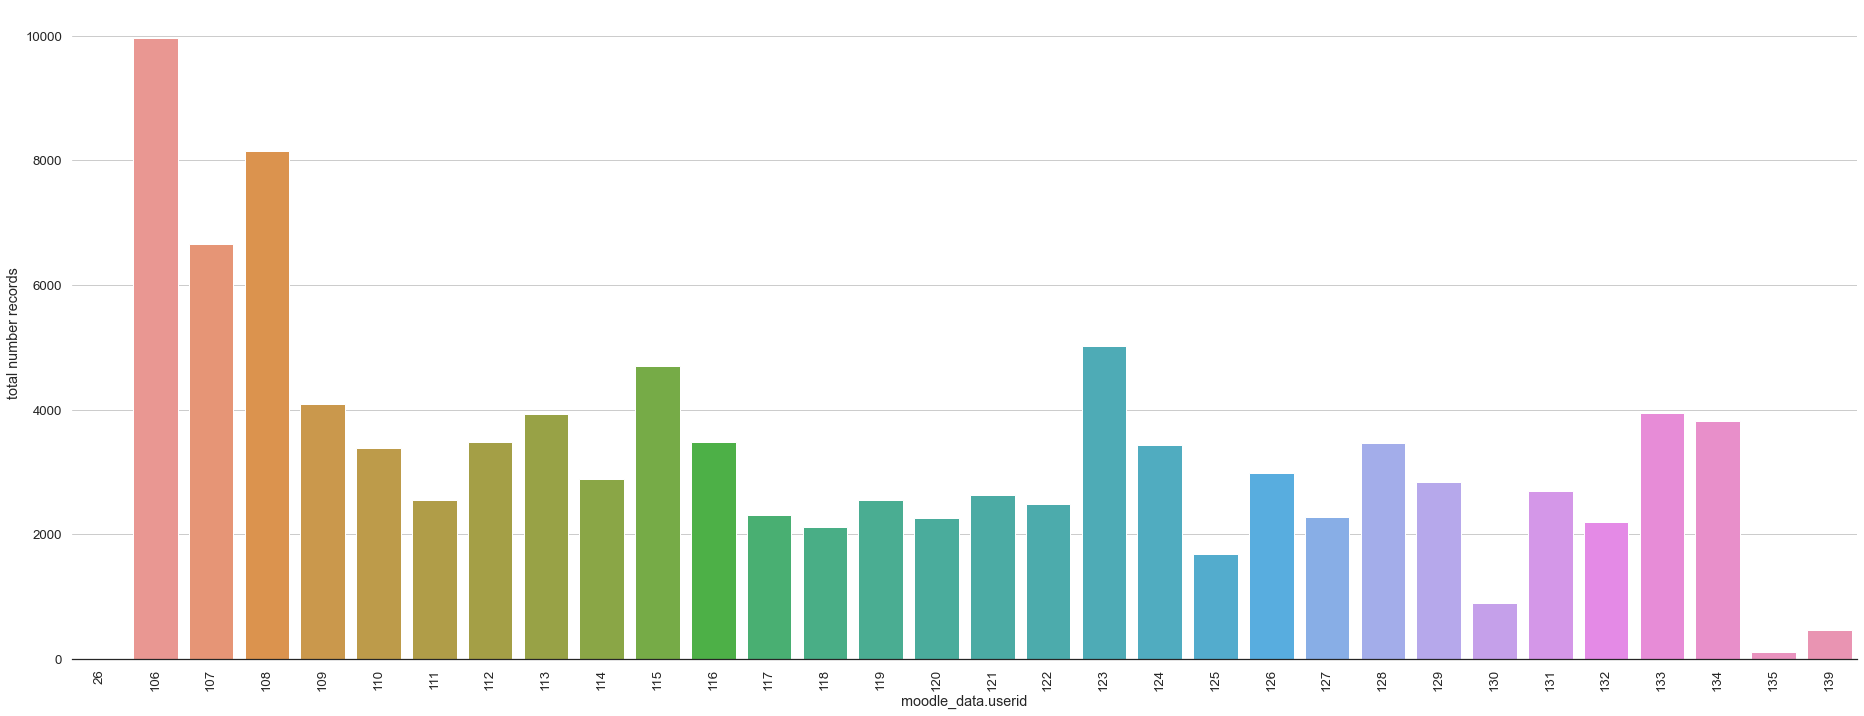

In [22]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_user.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro userid für den Studiengang 3
result = loggings_per_user
# Visualisierung der Mengen an Log-Einträgen pro userid für den Studiengang 3
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro userid für den Studiengang 4

In [23]:
loggings_per_user = moodle_data.userid[moodle_data.Studiengang.astype(int) == 4].groupby(moodle_data.userid).count()
display(loggings_per_user)

userid
1       1742
2        680
4       4005
6       4325
9       1167
10      3494
11      6914
12      5595
15     23717
16     10902
17     11865
21       342
24      1232
25       728
26       118
27       411
31        12
32      1113
42        10
50         8
55        34
136       25
143      618
Name: userid, dtype: int64

In [24]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_user.describe())

count       23.00000
mean      3437.26087
std       5581.13195
min          8.00000
25%        230.00000
50%       1113.00000
75%       4165.00000
max      23717.00000
Name: userid, dtype: float64

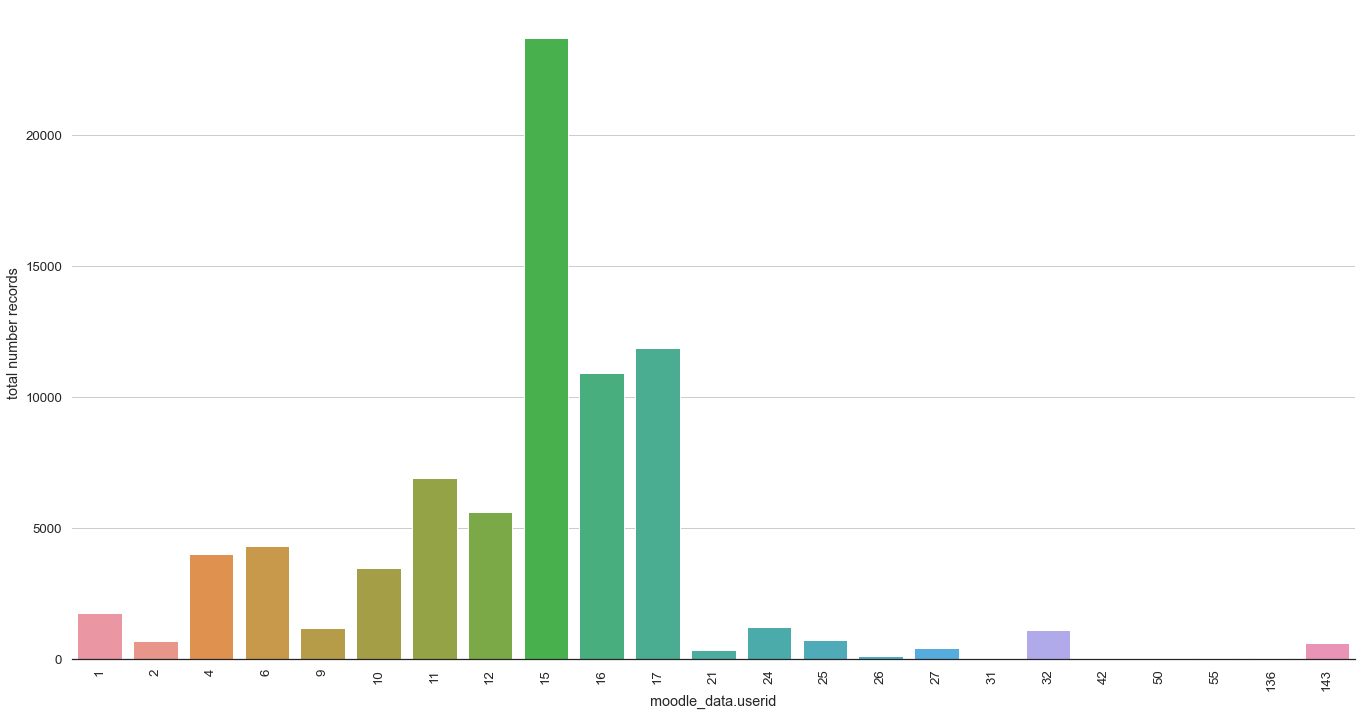

In [25]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_user.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro userid für den Studiengang 4
result = loggings_per_user
# Visualisierung der Mengen an Log-Einträgen pro userid für den Studiengang 4
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()